## 0.0 IMPORTS


In [83]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 0.1 Helper Functions


In [97]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

# 0.2. Loading data

In [3]:
df_sale_raw=pd.read_csv('C:/Users/Roberto Souza/Documents/DatasciencEmProdução/train.csv',low_memory=False)
df_store_raw=pd.read_csv('C:/Users/Roberto Souza/Documents/DatasciencEmProdução/store.csv',low_memory=False)

#merge
df_raw = pd.merge(df_sale_raw, df_store_raw, how='left', on='Store')

In [3]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
61815,491,6,2015-06-06,7321,571,1,0,0,0,d,c,4680.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# 1.0 DESCRIÇÃO DOS DADOS


In [4]:
df1=df_raw.copy()

## 1.1 Rename Columns

In [5]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x:inflection.underscore(x)

cols_new=list(map(snakecase, cols_old))

#rename
df1.columns=cols_new
      

## 1.2 Data Dimensions

In [6]:
print('Number of rows:{}'.format(df1.shape[0]))
print('Number of cols:{}'.format(df1.shape[1]))

Number of rows:1017209
Number of cols:18


## 1.3 Data Types

In [7]:
df1['date']= pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month         0
competition_open_since_year          0
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [12]:
df1['competition_distance'].max()

200000.0

In [20]:
#competition_distance 
df1['competition_distance']= df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x)


#competition_open_since_month 
df1['competition_open_since_month']= df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'])else x['competition_open_since_month'], axis=1)


#competition_open_since_year 
df1['competition_open_since_year']= df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
                              

#promo2_since_week 
df1['promo2_since_week']= df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis=1)



#promo2_since_year 
df1['promo2_since_year']= df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_year']) else x['promo2_since_year'], axis=1)



#promo_interval 
month_map={1: 'jan',2: 'Fev',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec',}

df1['promo_interval'].fillna(0,inplace=True)

df1['month_map']= df1['date'].dt.month.map(month_map)

df1['is_promo']= df1[['promo_interval','month_map']].apply( lambda x:0 if x['promo_interval']== 0 else 1 if  x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [21]:
df1.sample(5).T

,312042,930922,632722,131374,614129
store,1030,683,188,920,550
day_of_week,7,2,3,7,6
date,2014-10-12 00:00:00,2013-03-19 00:00:00,2013-12-11 00:00:00,2015-04-05 00:00:00,2013-12-28 00:00:00
sales,0,10174,3703,0,6774
customers,0,914,362,0,576
open,0,1,1,0,1
promo,0,1,0,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,1
store_type,a,a,d,a,d


In [22]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

In [23]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [74]:
df1['competition_open_since_month']= df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year']= df1['competition_open_since_year'].astype(int)

df1['promo2_since_week']= df1['promo2_since_week'].astype(int)
df1['promo2_since_year']= df1['promo2_since_year'].astype(int)


In [75]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical

In [65]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64','datetime64[ns]'])

In [76]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
177245,1076,1,3456,571,1,0,0,90.0,1,0
642001,547,2,7112,478,1,1,0,8990.0,1,1


In [77]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,competition_open_since_month,competition_open_since_year,promo2_since_week,promo2_since_year,promo_interval,month_map
374204,0,a,c,8,2013,5,2011,"Feb,May,Aug,Nov",Aug
666175,0,a,a,8,2013,40,2014,"Jan,Apr,Jul,Oct",Nov


### 1.7.1 Numerical Attributes

In [68]:
#Central tendency - mean , median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
             

#Dispersion - Std, Min ,Max, Range, skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T
    
 #concatenate
m= pd.concat([d2, d3 ,d4 ,ct1 , ct2, d1, d5 , d6]).T.reset_index()
m.columns=['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [69]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.124603,0.0,0.330268,2.273293,3.167867


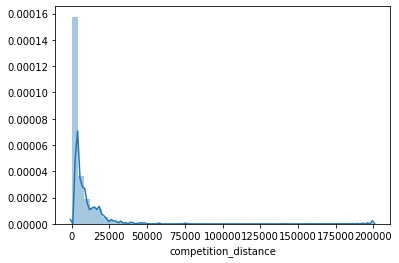

In [64]:
sns.distplot(df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [73]:
cat_attributes.apply( lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year               59
promo_interval                   4
month_map                       12
dtype: int64

In [99]:
 df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

<Figure size 1440x576 with 0 Axes>

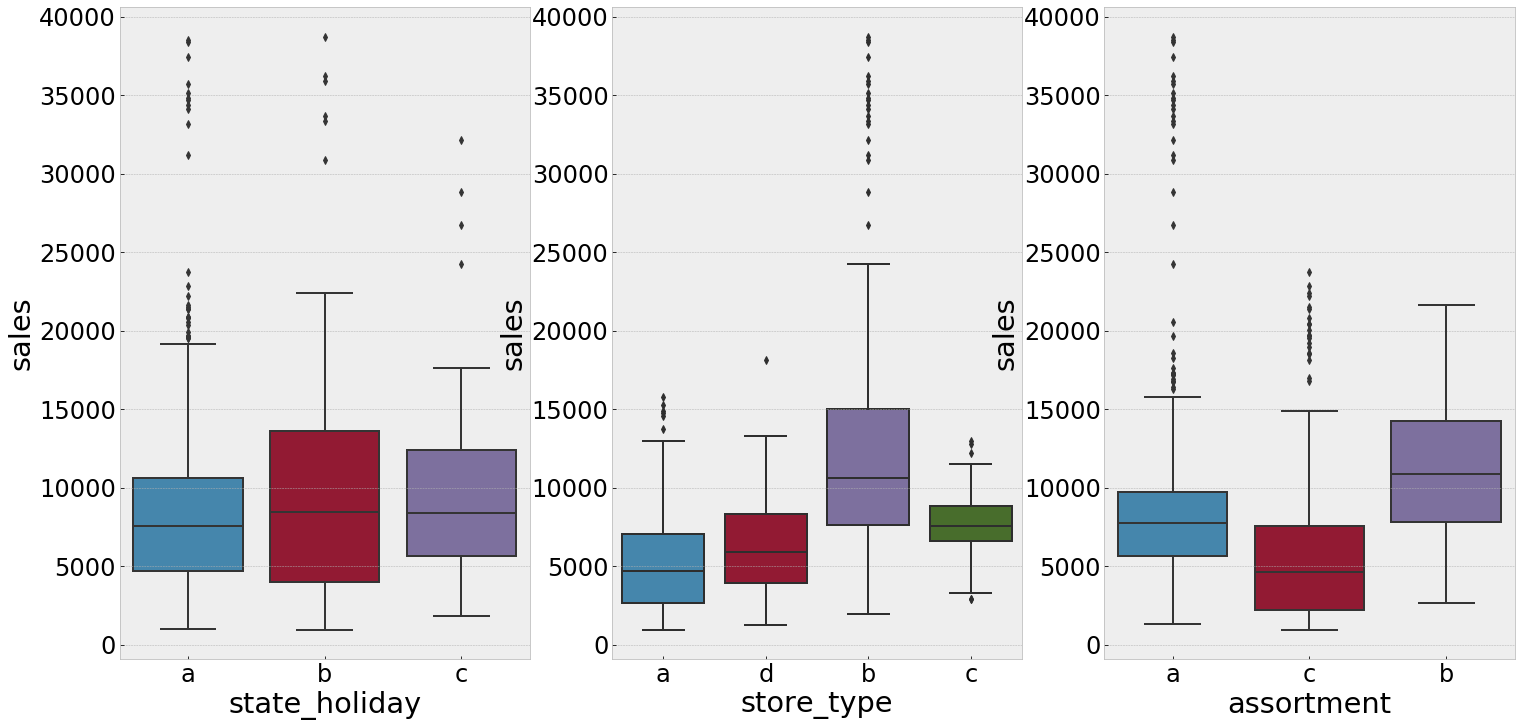

<Figure size 1440x576 with 0 Axes>

In [98]:
aux1 = df1[(df1['state_holiday'] !='0') & (df1['sales']>0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday',y='sales', data=aux1)


plt.subplot(1, 3, 2)
sns.boxplot(x='store_type',y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment',y='sales', data=aux1)
plt.figure(figsize=(20, 8))